# Airline Customer Satisfaction Prediction using ANN

In [3]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

%matplotlib inline

In [5]:
df = pd.read_csv(r"D:\data science\Data scientist\Projects\Project 3 ANN - DL\train.csv")

In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df.shape

(103904, 25)

In [11]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [13]:
df[df['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [14]:
df.fillna(0,inplace=True)

In [16]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [18]:
df.duplicated().sum()

0

### Separating continous and label column names

In [20]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [27]:
#df = df.drop('Unnamed: 0',axis = 1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

### Convert categorical columns to category dtypes

In [50]:
category_columns = ['Gender','Customer Type','Type of Travel','Class']
continous_columns = ['id','Age','Flight Distance','Inflight wifi service',
                     'Departure/Arrival time convenient','Ease of Online booking',
                     'Gate location','Food and drink','Online boarding','Seat comfort',
                     'Inflight entertainment', 'On-board service', 'Leg room service',
                     'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness',
                     'Departure Delay in Minutes','Arrival Delay in Minutes']
y_columns = ['satisfaction']




In [39]:
for cat in category_columns:
    df[cat] = df[cat].astype('category')

In [42]:
for cat in y_columns:
    df[cat] = df[cat].astype('category')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103904 non-null  int64   
 1   Gender                             103904 non-null  category
 2   Customer Type                      103904 non-null  category
 3   Age                                103904 non-null  int64   
 4   Type of Travel                     103904 non-null  category
 5   Class                              103904 non-null  category
 6   Flight Distance                    103904 non-null  int64   
 7   Inflight wifi service              103904 non-null  int64   
 8   Departure/Arrival time convenient  103904 non-null  int64   
 9   Ease of Online booking             103904 non-null  int64   
 10  Gate location                      103904 non-null  int64   
 11  Food and drink            

### Shuffling the data

In [44]:
#shuffle
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,128251,Male,Loyal Customer,59,Business travel,Business,2092,2,2,4,...,5,5,5,5,5,5,5,16,19.0,satisfied
1,54357,Female,disloyal Customer,24,Business travel,Eco,1235,4,4,4,...,1,4,3,4,3,4,3,167,139.0,neutral or dissatisfied
2,94812,Male,Loyal Customer,33,Business travel,Business,2722,2,4,4,...,2,1,3,3,1,3,2,13,12.0,neutral or dissatisfied
3,69498,Male,Loyal Customer,18,Personal Travel,Eco Plus,1089,3,4,3,...,1,1,5,1,2,5,1,0,0.0,neutral or dissatisfied
4,26707,Female,Loyal Customer,41,Personal Travel,Eco,270,0,4,0,...,3,3,2,5,3,5,3,0,0.0,satisfied


In [45]:
df['satisfaction'].cat.categories

Index(['neutral or dissatisfied', 'satisfied'], dtype='object')

In [47]:
df['Type of Travel'].cat.categories

Index(['Business travel', 'Personal Travel'], dtype='object')

In [48]:
df['Customer Type'].cat.categories

Index(['Loyal Customer', 'disloyal Customer'], dtype='object')

In [49]:
df['Class'].cat.categories

Index(['Business', 'Eco', 'Eco Plus'], dtype='object')

### Setting the embed sizes

In [72]:
cat_szs = [len(df[col].cat.categories) for col in category_columns]
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (2, 1), (2, 1), (3, 2)]

#### Converting catergorical data to tensors

In [73]:
gender = df['Gender'].cat.codes.values
cs_type = df['Customer Type'].cat.codes.values
Ty_of_travel = df['Type of Travel'].cat.codes.values
clas = df['Class'].cat.codes.values


cats = np.stack([gender,cs_type,Ty_of_travel,clas],1)

cats[:7]

array([[1, 0, 0, 0],
       [0, 1, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 1, 2],
       [0, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 1]], dtype=int8)

In [74]:
#converting numpy arrays to tensors

cats = torch.tensor(cats,dtype = torch.int64)

cats[:7]

tensor([[1, 0, 0, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 1, 2],
        [0, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 0, 1, 1]])

In [75]:
y = df['satisfaction'].cat.codes.values

y = torch.tensor(y,dtype = torch.int64)

y[:7]

tensor([1, 0, 0, 0, 1, 1, 0])

#### Converting continous data to tensors

In [70]:
conts = np.stack([df[col].values for col in continous_columns],1)
conts = torch.tensor(conts,dtype = torch.float)
conts[:7]


tensor([[1.2825e+05, 5.9000e+01, 2.0920e+03, 2.0000e+00, 2.0000e+00, 4.0000e+00,
         2.0000e+00, 5.0000e+00, 5.0000e+00, 4.0000e+00, 5.0000e+00, 5.0000e+00,
         5.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00, 1.6000e+01,
         1.9000e+01],
        [5.4357e+04, 2.4000e+01, 1.2350e+03, 4.0000e+00, 4.0000e+00, 4.0000e+00,
         4.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00,
         3.0000e+00, 4.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00, 1.6700e+02,
         1.3900e+02],
        [9.4812e+04, 3.3000e+01, 2.7220e+03, 2.0000e+00, 4.0000e+00, 4.0000e+00,
         4.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
         3.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 1.3000e+01,
         1.2000e+01],
        [6.9498e+04, 1.8000e+01, 1.0890e+03, 3.0000e+00, 4.0000e+00, 3.0000e+00,
         4.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         5.0000e+00, 1.0000e+00, 2.0000e+00

In [76]:
y.shape

torch.Size([103904])

In [77]:
conts.shape

torch.Size([103904, 19])

In [78]:
cats.shape

torch.Size([103904, 4])

## Test and Train Model

In [114]:
catz = cats[:7]
catz

tensor([[1, 0, 0, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 1, 2],
        [0, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 0, 1, 1]])

In [115]:
emb_szs

[(2, 1), (2, 1), (2, 1), (3, 2)]

In [116]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
selfembeds
for i in selfembeds:
    print(i)

Embedding(2, 1)
Embedding(2, 1)
Embedding(2, 1)
Embedding(3, 2)


In [148]:
class TabularModel(nn.Module):
    
    def __init__(self,emb_szs,n_cont,out_sz,layers,p = 0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p) # technique to avoid overfitting
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [149]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4) 

In [150]:
batch_size = 103904
test_size = 31171
diff = batch_size - test_size

cat_train = cats[:diff]
cat_test = cats[diff:batch_size]
con_train = conts[:diff]
con_test = conts[diff:batch_size]
y_train = y[:diff]
y_test = y[diff:batch_size]

In [128]:
len(cat_train)

72733

In [129]:
len(con_train)

72733

In [130]:
len(y_train)

72733

In [131]:
len(cat_test)

31171

In [132]:
len(con_test)

31171

In [133]:
len(y_test)

31171

In [151]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [152]:
import time
start_time = time.time()

epochs = 1000
losses = []

for i in range(epochs):
    i = i+1
    y_pred = model(cat_train,con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed
    

epoch:   1  loss: 0.78948575
epoch:  26  loss: 0.23825958
epoch:  51  loss: 0.18448788
epoch:  76  loss: 0.15656921
epoch: 101  loss: 0.14175181
epoch: 126  loss: 0.13278049
epoch: 151  loss: 0.12564446
epoch: 176  loss: 0.12264418
epoch: 201  loss: 0.11634686
epoch: 226  loss: 0.11432732
epoch: 251  loss: 0.10980576
epoch: 276  loss: 0.10855845
epoch: 301  loss: 0.10631803
epoch: 326  loss: 0.10498178
epoch: 351  loss: 0.10252241
epoch: 376  loss: 0.10149067
epoch: 401  loss: 0.10116623
epoch: 426  loss: 0.09996014
epoch: 451  loss: 0.09990887
epoch: 476  loss: 0.09716039
epoch: 501  loss: 0.09794958
epoch: 526  loss: 0.09688347
epoch: 551  loss: 0.09760341
epoch: 576  loss: 0.09590451
epoch: 601  loss: 0.09517289
epoch: 626  loss: 0.09382916
epoch: 651  loss: 0.09574563
epoch: 676  loss: 0.09352733
epoch: 701  loss: 0.09567324
epoch: 726  loss: 0.09326078
epoch: 751  loss: 0.09266559
epoch: 776  loss: 0.09121493
epoch: 801  loss: 0.09098496
epoch: 826  loss: 0.09020428
epoch: 851  lo

### Plot loss function

Text(0.5, 0, 'epoch')

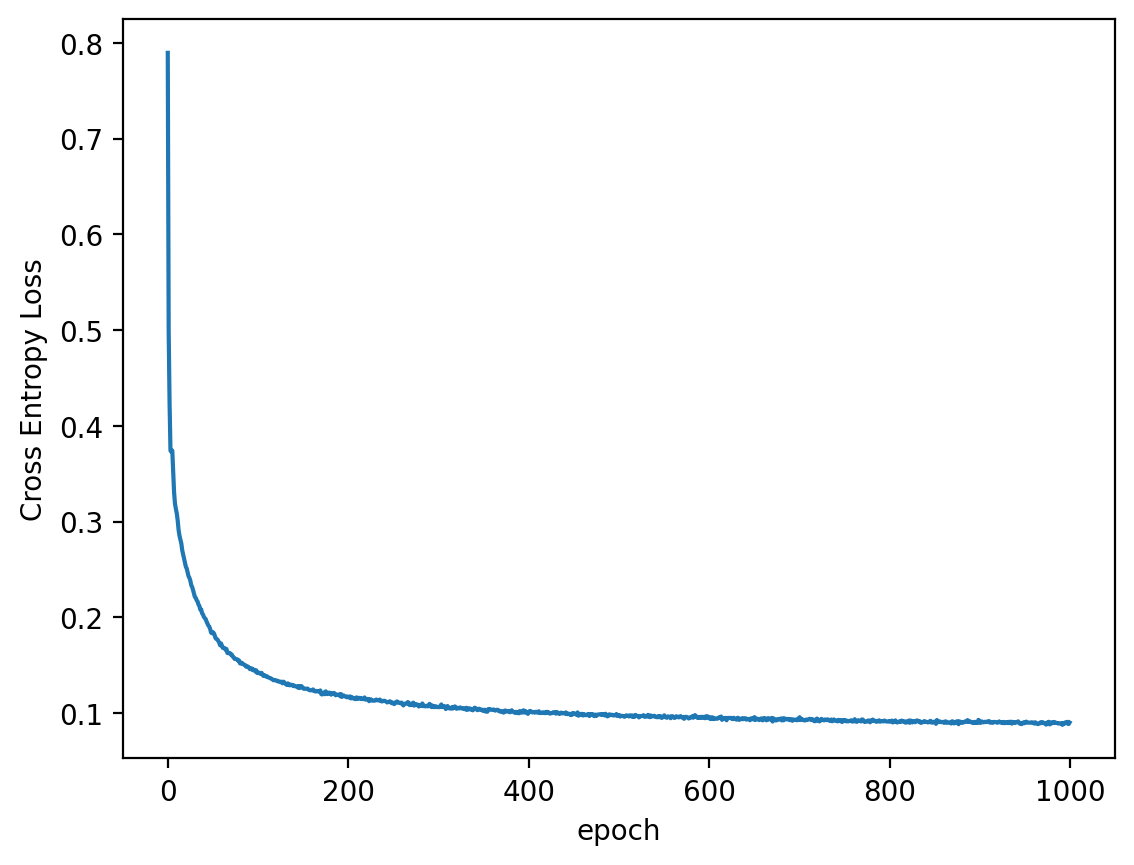

In [180]:
plt.figure(dpi = 200)
ls = [loss.detach().numpy() for loss in losses]
plt.plot(range(epochs), ls)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')

## Model Validation

In [158]:
with torch.no_grad():
    y_val = model(cat_test,con_test)
    loss = criterion(y_val,y_test)
print(f"CE loss: {loss }")

CE loss: 0.11353566497564316


## Saving the model

In [161]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'D:\data science\Data scientist\Projects\Project 3 ANN - DL\Airlinessatisfaction.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

## Feeding new data

In [169]:
def test_data(mdl):
    gen = input("enter gender = ")
    cus = input("Customer type = ")
    typ = input("Type of travel = ")
    clas = input("Travel class = ")
    id_ = int(input("enter id = "))
    ag = int(input("enter age = "))
    fg = int(input("Flight Distance = "))
    wi = int(input("Inflight wifi service = "))
    d = int(input("Departure/Arrival time convenient = "))
    e = int(input("Ease of Online booking = "))
    g = int(input("Gate location = "))
    fd = int(input("Food and drink = "))
    ob = int(input("Online boarding = "))
    sc = int(input("Seat comfort = "))
    ife = int(input("Inflight entertainment = "))
    obs = int(input("On-board service = "))
    lgs = int(input("Leg room service = "))
    bag = int(input("Baggage handling = "))
    Che = int(input("Checkin service = "))
    ifs = int(input("Inflight service = "))
    cl = int(input("Cleanliness = "))
    dd = int(input("Departure Delay in Minutes = "))
    ad = int(input("Arrival Delay in Minutes = "))
    
    
    gen_d = {'Male':0,'Female':1}
    cus_d = {'Loyal Customer':0,'disloyal Customer':1}
    typ_d = {'Business travel':0,'Personal Travel':1}
    clas_d = {'Eco':0,'Business':1,'Eco Plus':2}
    
    gen = gen_d[gen]
    cus = cus_d[cus]
    typ = typ_d[typ]
    clas = clas_d[clas]
    
    xcats = torch.tensor([gen, cus, typ, clas], dtype=torch.int64).reshape(1,-1)
    xconts = torch.tensor([id_, ag, fg, wi, d, e, g, fd, ob, sc, ife, obs, lgs, bag, Che, ifs, cl, dd, ad], dtype=torch.float).reshape(1,-1)
    
    mdl.eval()
    
    with torch.no_grad():
        z = mdl(xcats, xconts).argmax().item()
        
        
    if z == 1:
         print('Customer is satisfied!')
    else:
        print("Customer is not Satisfied!")
    
test_data(model)

enter gender = Male
Customer type = Loyal Customer
Type of travel = Business travel
Travel class = Business
enter id = 44304
enter age = 25
Flight Distance = 1428
Inflight wifi service = 4
Departure/Arrival time convenient = 4
Ease of Online booking = 4
Gate location = 4
Food and drink = 4
Online boarding = 4
Seat comfort = 4
Inflight entertainment = 4
On-board service = 1
Leg room service = 5
Baggage handling = 3
Checkin service = 1
Inflight service = 5
Cleanliness = 4
Departure Delay in Minutes = 0
Arrival Delay in Minutes = 0
Customer is satisfied!


In [172]:
dftest = pd.read_csv(r"D:\data science\Data scientist\Projects\Project 3 ANN - DL\test.csv")

In [179]:
test_data_dftest = dftest[dftest['id'] == 44304]
test_data_dftest.transpose()

,23
Unnamed: 0,23
id,44304
Gender,Male
Customer Type,Loyal Customer
Age,25
Type of Travel,Business travel
Class,Business
Flight Distance,1428
Inflight wifi service,4
Departure/Arrival time convenient,4


### This data was taken from sepearate test dataset

### The model predicted correctly that the customer was satisfied with the airline service